In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

In [ ]:


import sys
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/Divyashanmugapriyan/Dataset/main/marketing_campaign.csv ",sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
# Clearing missing values
data = data.dropna()
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
data.select_dtypes(include="object").nunique()


Education           5
Marital_Status      8
Dt_Customer       662
dtype: int64

In [ ]:
data["Education"].unique()


array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
data["Marital_Status"].unique()


array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
data["Marital_Status"].value_counts()


Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
import datetime
from datetime import date

In [ ]:
data["Age"] = 2021 - data["Year_Birth"]
data["Total_Spend"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data['MntGoldProds']
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
last_date = date(2014,7,1)

In [ ]:
data["T"] = pd.to_numeric(data["Dt_Customer"].dt.date.apply(lambda x: (last_date - x)).dt.days,downcast="integer")
data["Marital_Status"] = data["Marital_Status"].replace({'Divorced':'Single', 'Single':'Single', 'Alone':'Single',
                                                        'Widow':'Single', 'Absurd':'Single', 'YOLO':'Single','Married':'Married','Together':'Married'})

In [ ]:
drop_list = ['ID' ,'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth']
data.drop(drop_list, axis=1 ,inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [ ]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spend,T
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,64,1617,665
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,67,27,115
2,Graduation,Married,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,56,776,314
3,Graduation,Married,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,37,53,141
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,40,422,163


##Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

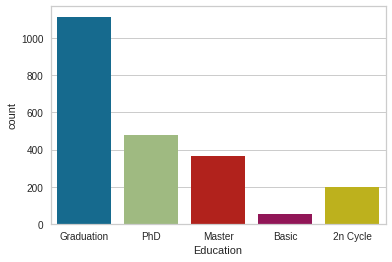

In [ ]:
sns.countplot(x="Education",data=data)

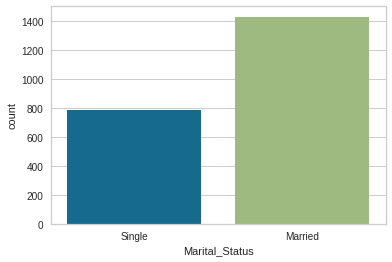

In [ ]:
sns.countplot(x="Marital_Status",data=data)


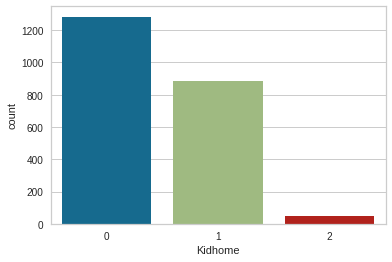

In [ ]:
sns.countplot(x="Kidhome",data=data)


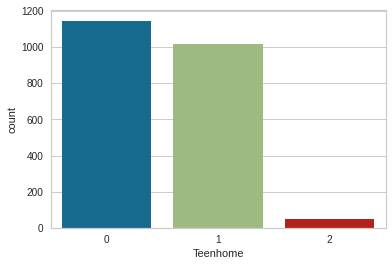

In [ ]:
sns.countplot(x="Teenhome",data=data)


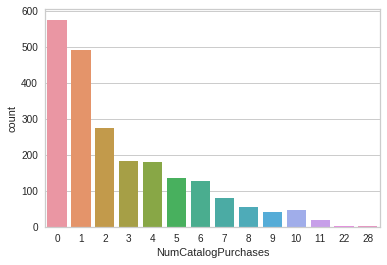

In [ ]:
sns.countplot(x="NumCatalogPurchases",data=data)


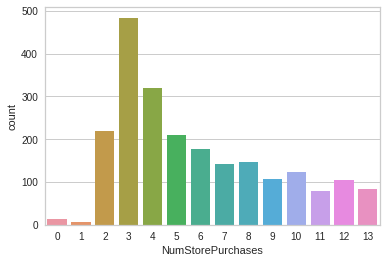

In [ ]:
sns.countplot(x="NumStorePurchases",data=data)

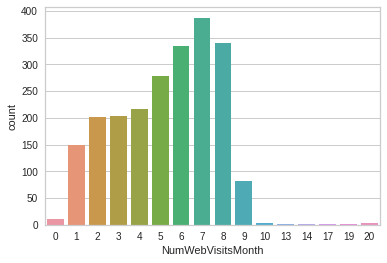

In [ ]:
sns.countplot(x="NumWebVisitsMonth",data=data)

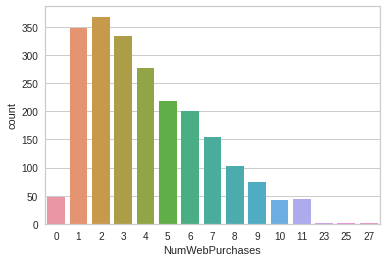

In [ ]:
sns.countplot(x="NumWebPurchases",data=data)

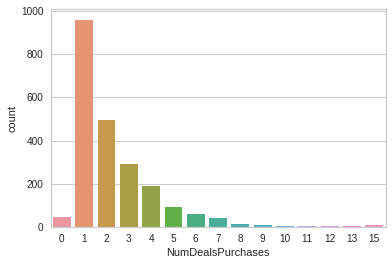

In [ ]:
sns.countplot(x="NumDealsPurchases",data=data)

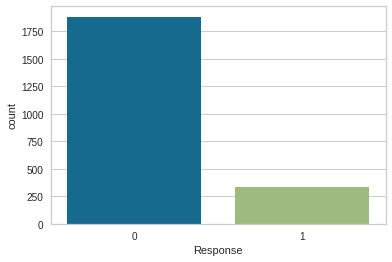

In [ ]:
sns.countplot(x="Response",data=data)

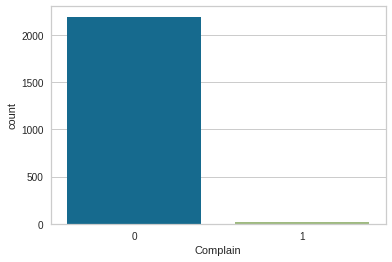

In [ ]:
sns.countplot(x="Complain",data=data)

In [ ]:
from operator import le
from sklearn.preprocessing import LabelEncoder


In [ ]:
le=LabelEncoder()
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
for i in cat_cols:
    data[i] = le.fit_transform(data[[i]])

In [ ]:
# standardization process
df = data.copy()

In [ ]:
# leaving out variables like accepted campaigns
col_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
df = df.drop(col_del, axis=1)

In [ ]:
# Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
print("Scaled")

Scaled


In [ ]:
scaled_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_Spend,T
0,-0.350527,1.348829,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443,1.675488,1.529129
1,-0.350527,1.348829,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,-0.962358,-1.188411
2,-0.350527,-0.741384,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822,0.280250,-0.205155
3,-0.350527,-0.741384,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777,-0.919224,-1.059945
4,1.429011,-0.741384,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420,-0.307044,-0.951244


In [ ]:
# PCA : is a technique that reduces the dimensionality of datasets, increases their
# interpretability, and also minimizes information loss.
# setting the number of dimensions as 3 and plotting the data2set
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=["columns1", "columns2", "columns3"])

In [ ]:
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
columns1,2216.0,-4.709430e-17,2.643626,-5.134505,-2.454786,-0.685245,2.310020,7.204034
columns2,2216.0,4.529069e-17,1.441482,-3.065571,-1.129236,-0.221116,1.017981,4.989336
columns3,2216.0,-3.657323e-17,1.243152,-3.954618,-0.822674,0.028806,0.789595,5.086022


In [ ]:
x = pca_df["columns1"]
y = pca_df["columns2"]
z = pca_df["columns3"]

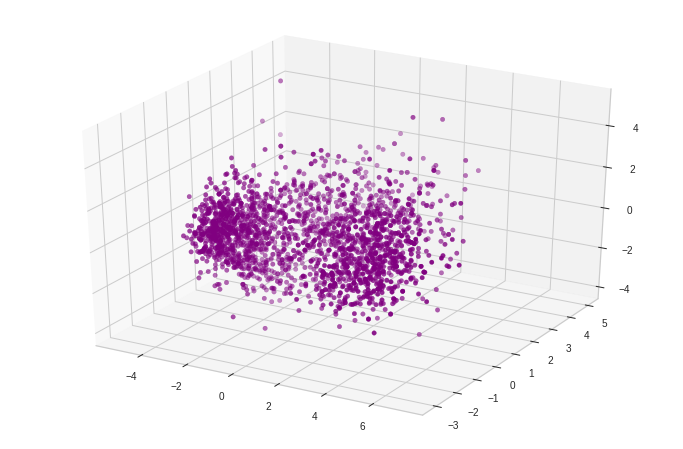

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="purple", marker="o")
plt.show()

#clustering

1. Determining the number of clusters to be created with the Elbow Method
2. Clustering with Gaussian Mixture Model
3. Visualization of created clusters 

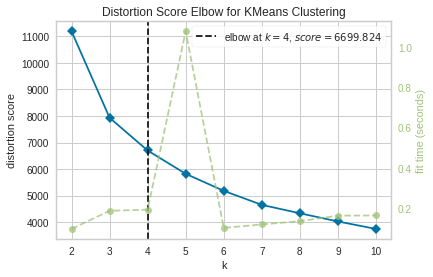

In [ ]:
# 1. Applying elbow method
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(pca_df)
elbow_method.show()

In [ ]:
# 2. Clustering with Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, covariance_type='spherical', max_iter=2000, random_state=42).fit(pca_df)
labels = gmm.predict(pca_df)

In [ ]:
pca_df['Clusters'] = labels
data['Clusters'] = labels


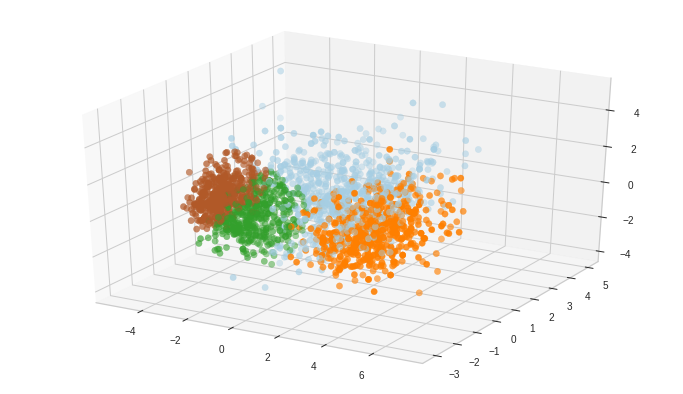

In [ ]:
# 3. Plot the clusters
fig = plt.figure(figsize=(12,7))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df['Clusters'], marker="o", cmap="Paired_r")
plt.show()

#Evaluation

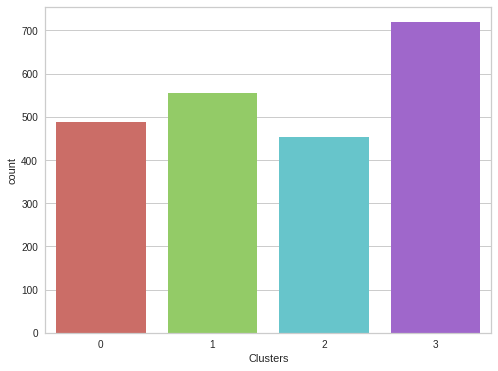

In [ ]:

plt.figure(figsize=(8,6))
sns.countplot(x=data['Clusters'], palette="hls")


In [ ]:
# Interpreting the clusters according to the Income and Total Spend features:
"""
Group 0: low spend - low income
Group 1: high spend - average income
Group 2: high spend - high income
Group 3: low spend - average income """

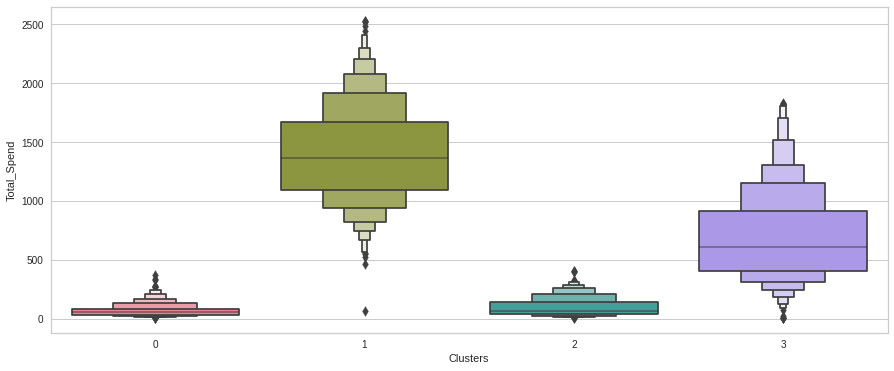

In [ ]:
plt.figure(figsize=(15,6))
sns.boxenplot(x="Clusters", y="Total_Spend", palette="husl", data=data);

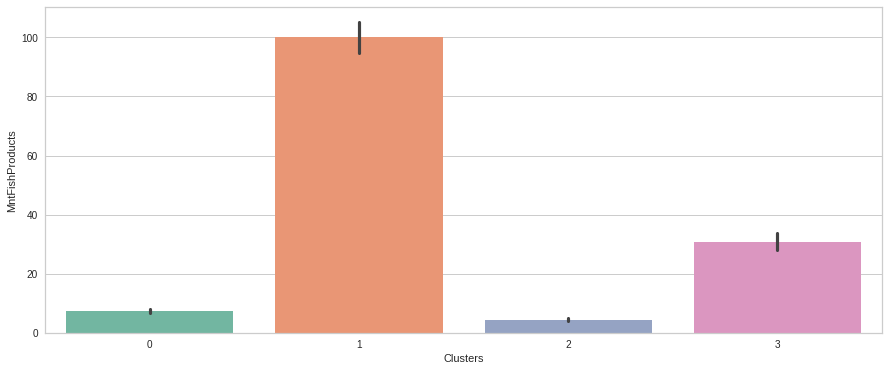

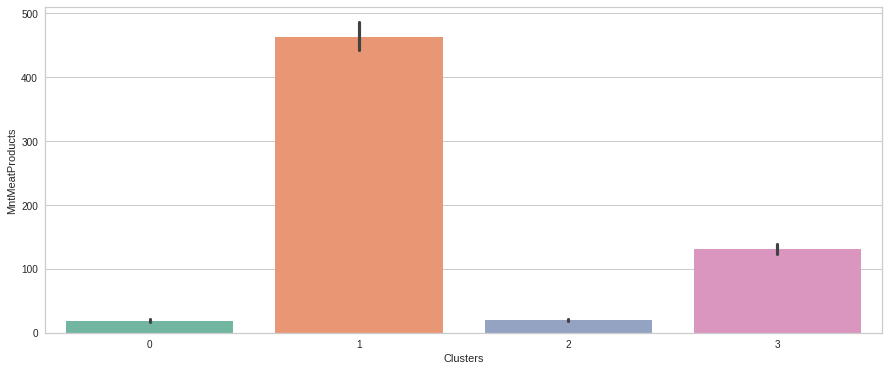

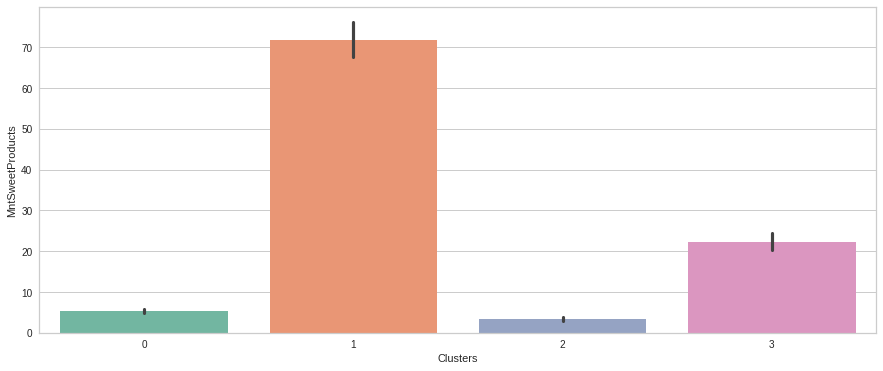

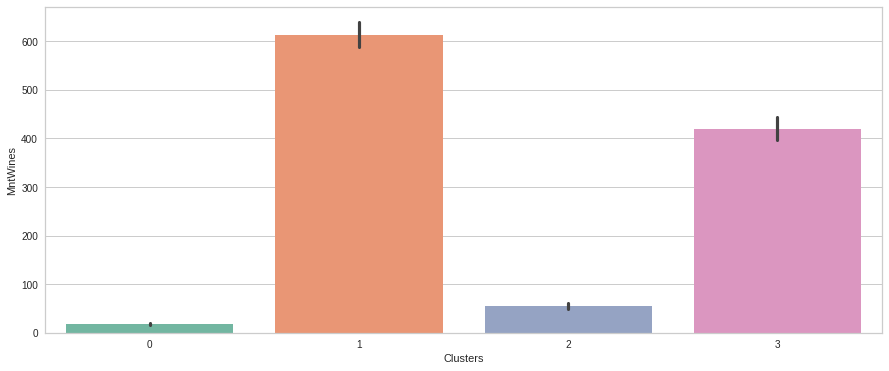

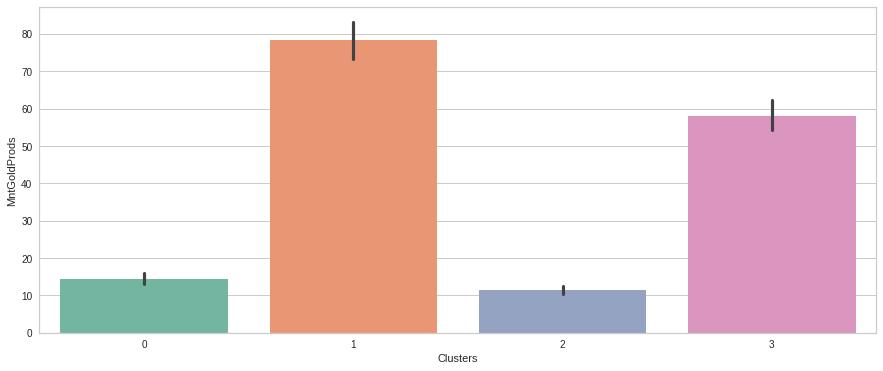

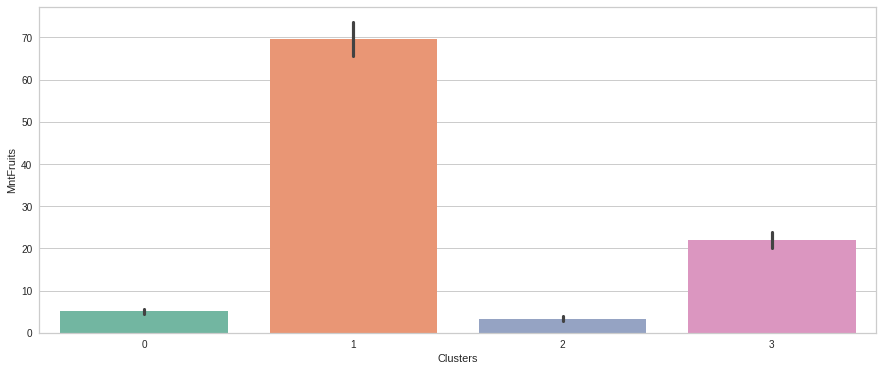

In [ ]:
# the distribution of clusters by products
prod = ['MntFishProducts', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'MntGoldProds','MntFruits']
for i in prod:
    plt.figure(figsize=(15,6))
    sns.barplot(x="Clusters", y=i, palette="Set2",data=data);
  